CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


C:\Users\86183\AppData\Local\Temp\ipykernel_28124\2720155085.py:30: RuntimeWarning: invalid value encountered in subtract
  theta = theta - descent


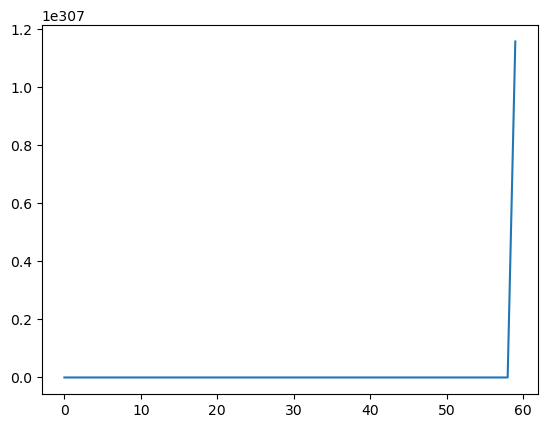

In [63]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

boston = pd.read_csv('D:\code\大三课程\机器学习\实验\实验一\\boston_house_prices.csv')
print(boston.isnull().sum())
X = boston.iloc[:,1:13]
y = boston['MEDV']


reg = linear_model.LinearRegression()
reg.fit(X, y)

def cost(theta, X, y):
    m = len(y)
    predictions = X.dot(theta) 
    error = (predictions - y)
    cost = (1/2*m) * np.dot(error.transpose(), error)
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = np.dot(X,theta)
        error = np.dot(X.transpose(),(predictions - y))
        descent = alpha * 1/m * error  
        theta = theta - descent  
        cost_history[i] = cost(theta, X, y)  
    return theta, cost_history

theta = np.zeros(X.shape[1])
alpha = 0.001
iterations = 1000

optimal_theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)


fig, ax = plt.subplots()  
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')

def animate(i):
    global theta, cost_history

    theta, cost = gradient_descent(X, y, theta, alpha, 1)
    
    np.append(cost_history, cost)
    ax.clear()
    ax.plot(range(len(cost_history)), cost_history)

for i in range(iterations):
    # 动态绘制
    animate(i)  
    plt.pause(0.1)

# 结束后静态绘制
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()